Import the necessary modules

In [1]:
import random
import statistics
import matplotlib.pyplot as plt


Make helper functions

In [2]:
def pickedCandy() -> bool:
    return random.randint(0, 1) == 1

def getProportionAccepted(l:list) -> float:
    return (sum(1.0 for element in l if element) / len(l))

def getProportionDiff(list1:list, list2:list) -> float:
    return getProportionAccepted(list2) - getProportionAccepted(list1)


Define classes for each person. In this case, Gio, Gene, and Teddy. Each class has the total number of males/females interacted with across the two outfit treatments. Make the constructor initialize a list for each of these groups. This list should be a list of booleans, True if accepted candy, False if declined, with the size corresponding to the number of people interacted with. These classes also have functionality to compare the proportion differences between boys and girls. This method is only called when testing for significance in gender differences



In [3]:
class GIO():
    CRUSTY_N_GIRLS = 10
    CRUSTY_N_BOYS = 10
    NICE_N_GIRLS = 10
    NICE_N_BOYS = 10

    def __init__(self) -> None:
        self.crustygirls = [pickedCandy() for a in range(GIO.CRUSTY_N_GIRLS)]
        self.crustyboys = [pickedCandy() for a in range(GIO.CRUSTY_N_BOYS)]
        self.nicegirls = [pickedCandy() for a in range(GIO.NICE_N_GIRLS)]
        self.niceboys = [pickedCandy() for a in range(GIO.NICE_N_BOYS)]

    def compare_proportion_differences(self) ->float:
        return getProportionDiff(self.crustyboys, self.niceboys) - getProportionDiff(self.crustygirls, self.nicegirls)
   

class GENE():
    CRUSTY_N_GIRLS = 10
    CRUSTY_N_BOYS = 10
    NICE_N_GIRLS = 10
    NICE_N_BOYS = 10

    def __init__(self) -> None:
        self.crustygirls = [pickedCandy() for a in range(GIO.CRUSTY_N_GIRLS)]
        self.crustyboys = [pickedCandy() for a in range(GIO.CRUSTY_N_BOYS)]
        self.nicegirls = [pickedCandy() for a in range(GIO.NICE_N_GIRLS)]
        self.niceboys = [pickedCandy() for a in range(GIO.NICE_N_BOYS)]

    def compare_proportion_differences(self) ->float:
        return getProportionDiff(self.crustyboys, self.niceboys) - getProportionDiff(self.crustygirls, self.nicegirls)


class TEDDY():
    CRUSTY_N_GIRLS = 10
    CRUSTY_N_BOYS = 10
    NICE_N_GIRLS = 10
    NICE_N_BOYS = 10

    def __init__(self) -> None:
        self.crustygirls = [pickedCandy() for a in range(GIO.CRUSTY_N_GIRLS)]
        self.crustyboys = [pickedCandy() for a in range(GIO.CRUSTY_N_BOYS)]
        self.nicegirls = [pickedCandy() for a in range(GIO.NICE_N_GIRLS)]
        self.niceboys = [pickedCandy() for a in range(GIO.NICE_N_BOYS)]

    def compare_proportion_differences(self) ->float:
        return getProportionDiff(self.crustyboys, self.niceboys) - getProportionDiff(self.crustygirls, self.nicegirls)


Now, I determined the number of trials I would like to do. In other words, the amount of times you want to repeat the component of the simulation

In [4]:
HOW_MANY_RUNS = 50000


Now, we can write the code for determining significance of different outfits. We ignore the stratification of boys and girls, and treat them as one group (notice we concatenate their lists). We take the differences between the proportion of people who accepted with crusty fits and nice fits, and we take the average of this value across the three of us. We append it to a list, and this repeats N times

In [5]:
def initial_sim():
    results = []
    for x in range(HOW_MANY_RUNS):

        ##Take the difference in proportion accepted between crusty and nice for each persion, ignoring whether they are boys or girls. 
        ##then, take the average difference
        differences = []
        gio = GIO()
        differences.append(
            getProportionAccepted(gio.crustyboys + gio.crustygirls) 
            - getProportionAccepted(gio.niceboys + gio.nicegirls)
        )

        gene = GENE()
        differences.append(
            getProportionAccepted(gene.crustyboys + gene.crustygirls) 
            - getProportionAccepted(gene.niceboys + gene.nicegirls)
        )

        teddy = TEDDY()
        differences.append(
            getProportionAccepted(teddy.crustyboys + teddy.crustygirls) 
            - getProportionAccepted(teddy.niceboys + teddy.nicegirls)
        )

        results.append(statistics.mean(differences))

    return results


To determine statistical significane of gender, we do the same thing, but for each of us, we get the difference in the difference of proportions etween boys and girls. Then we take the average across th three of us.

In [6]:
def sim_for_gender_diff():
    results = []
    for x in range(HOW_MANY_RUNS):
        gio = GIO()
        gio_diff = gio.compare_proportion_differences()

        gene = GENE()
        gene_diff = gene.compare_proportion_differences()

        teddy = TEDDY()
        teddy_diff = teddy.compare_proportion_differences()

        results.append(statistics.mean([gio_diff, gene_diff, teddy_diff]))
    return results

Lets make graphs!

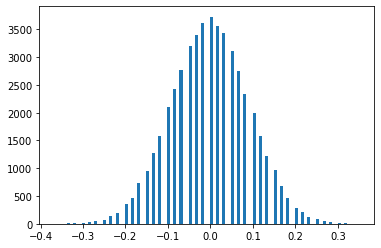

In [7]:
trials = initial_sim()
plt.hist(trials,100)
plt.show()

Now, the actual analysis. Something is only statistically significant if it falls within the 5% margin

In [ ]:
def analyze_initial(our_average_difference):
    trials = initial_sim()
    percent_greater_than_observed = (sum([1.0 for x in trials if x >= our_average_difference]) / len(trials)) * 100
    if percent_greater_than_observed <= 5:
        print('Statistically significant. Only ' + str(percent_greater_than_observed) + '% of trials achieved a difference greater than ' + str(our_average_difference))
    else:
        print('falls within natural error. ' + str(percent_greater_than_observed) + '% of trials achieved a difference greater than ' + str(our_average_difference))

def analyze_gender_diff(our_average_gender_proportion_difference):
    trials = sim_for_gender_diff()
    percent_greater_than_observed = (sum([1.0 for x in trials if x >= our_average_gender_proportion_difference]) / len(trials)) * 100
    if percent_greater_than_observed <= 5:
        print('Statistically significant. Only ' + str(percent_greater_than_observed) + '% of trials achieved a difference greater than ' + str(our_average_gender_proportion_difference))
    else:
        print('falls within natural error. ' + str(percent_greater_than_observed) + '% of trials achieved a difference greater than ' + str(our_average_gender_proportion_difference))
